In [1]:
from scipy import linalg as la
from scipy import optimize

In [2]:
import sympy
sympy.init_printing()
import numpy as np
import matplotlib.pyplot as plt

In [3]:
A = sympy.Matrix([[2, 3], [5, 4]])
b = sympy.Matrix([4, 3])

In [4]:
A

⎡2  3⎤
⎢    ⎥
⎣5  4⎦

In [5]:
b

⎡4⎤
⎢ ⎥
⎣3⎦

In [6]:
A.rank()

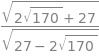

In [7]:
A.condition_number()

In [8]:
sympy.N(_)

In [9]:
A.norm()

In [10]:
sympy.N(_)

In [11]:
3*np.sqrt(6)

In [12]:
A = np.array([[2, 3], [5, 4]])
A

array([[2, 3],
       [5, 4]])

In [13]:
b = np.array([4, 3])
b

array([4, 3])

In [14]:
np.linalg.matrix_rank(A)

2

In [15]:
np.linalg.cond(A)

In [16]:
np.linalg.norm(A)

In [17]:
A = sympy.Matrix([[2, 3], [5, 4]])
b = sympy.Matrix([4, 3])

In [18]:
L, U, _ = A.LUdecomposition()

In [19]:
L

⎡ 1   0⎤
⎢      ⎥
⎣5/2  1⎦

In [20]:
U

⎡2   3  ⎤
⎢       ⎥
⎣0  -7/2⎦

In [21]:
L*U

⎡2  3⎤
⎢    ⎥
⎣5  4⎦

In [22]:
x = A.solve(b)
x

⎡-1⎤
⎢  ⎥
⎣2 ⎦

In [23]:
x = A.LUsolve(b)
x

⎡-1⎤
⎢  ⎥
⎣2 ⎦

In [24]:
A = np.array([[2, 3], [5, 4]])
b = np.array([4, 3])

In [25]:
P, L, U = la.lu(A)
(P, L, U)

(array([[0., 1.],
        [1., 0.]]),
 array([[1. , 0. ],
        [0.4, 1. ]]),
 array([[5. , 4. ],
        [0. , 1.4]]))

In [26]:
P.dot(L.dot(U))

array([[2., 3.],
       [5., 4.]])

In [27]:
la.solve(A, b)

array([-1.,  2.])

In [28]:
p = sympy.symbols('p', positive=True)
A = sympy.Matrix([[1, sympy.sqrt(p)], [1, 1/sympy.sqrt(p)]])
A

⎡1  √p⎤
⎢     ⎥
⎢   1 ⎥
⎢1  ──⎥
⎣   √p⎦

In [29]:
b = sympy.Matrix([1, 2])
b

⎡1⎤
⎢ ⎥
⎣2⎦

In [30]:
x = A.solve(b)
x

⎡2⋅p - 1 ⎤
⎢─────── ⎥
⎢ p - 1  ⎥
⎢        ⎥
⎢   1    ⎥
⎢────────⎥
⎢      1 ⎥
⎢-√p + ──⎥
⎣      √p⎦

In [31]:
x_sym_sol = A.solve(b)
Acond = A.condition_number().simplify()

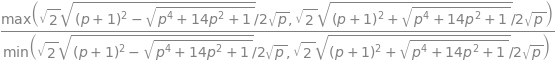

In [32]:
Acond

In [33]:
AA = lambda p: np.array([[1, np.sqrt(p)], [1, 1/np.sqrt(p)]], dtype='float')
b = np.array([1, 2], dtype='float')

In [34]:
x_num_sol = lambda p: np.linalg.solve(AA(p), b)

Text(0.5, 0, '$p$')

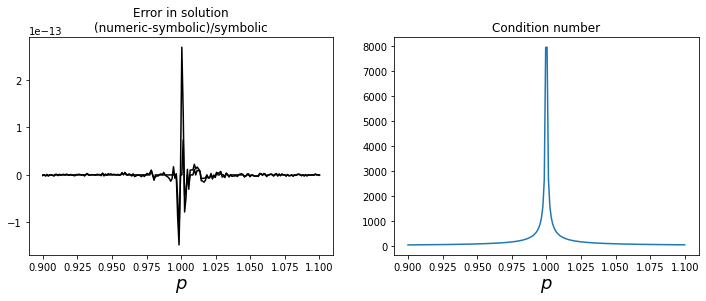

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
p_vec = np.linspace(0.9, 1.1, 200)
for n in range(2):
    x_sym = np.array([x_sym_sol[n].subs(p, pp).evalf() for pp in p_vec])
    x_num = np.array([x_num_sol(pp)[n] for pp in p_vec])
    axes[0].plot(p_vec, (x_num-x_sym)/x_sym, 'k')
axes[0].set_title('Error in solution\n(numeric-symbolic)/symbolic')
axes[0].set_xlabel(r'$p$', fontsize=18)
axes[1].plot(p_vec, [Acond.subs(p, pp).evalf() for pp in p_vec])
axes[1].set_title('Condition number')
axes[1].set_xlabel(r'$p$', fontsize=18)

In [40]:
x_vars = sympy.symbols('x_1, x_2, x_3')
A = sympy.Matrix([[1, 2, 3], [4, 5, 6]])
x = sympy.Matrix(x_vars)
b = sympy.Matrix([7, 8])
sympy.solve(A*x-b, x_vars)

In [41]:
x = np.linspace(-1, 1, 100)
a, b, c = 1, 2, 3
y_exact = a+b*x+c*x**2

In [42]:
m = 100
X = 1-2*np.random.rand(m)
Y = a+b*X+c*X**2+np.random.randn(m)

In [43]:
A = np.vstack([X**0, X**1, X**2])

In [44]:
sol, r, rank, sv = la.lstsq(A.T, Y)

In [45]:
y_fit = sol[0]+sol[1]*x+sol[2]*x**2

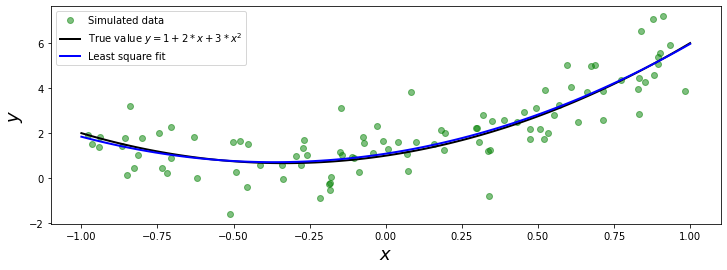

In [46]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(X, Y, 'go', alpha=0.5, label='Simulated data')
ax.plot(x, y_exact, 'k', lw=2, label=r'True value $y=1+2*x+3*x^2$')
ax.plot(x, y_fit, 'b', lw=2, label='Least square fit')
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$y$', fontsize=18)
ax.legend(loc=2)

In [47]:
A = np.vstack([X**n for n in range(2)])
sol, r, rank, sv = la.lstsq(A.T, Y)

In [48]:
y_fit1 = sum([s*x**n for n, s in enumerate(sol)])

In [49]:
A = np.vstack([X**n for n in range(16)])
sol, r, rank, sv = la.lstsq(A.T, Y)

In [50]:
y_fit15 = sum([s*x**n for n, s in enumerate(sol)])

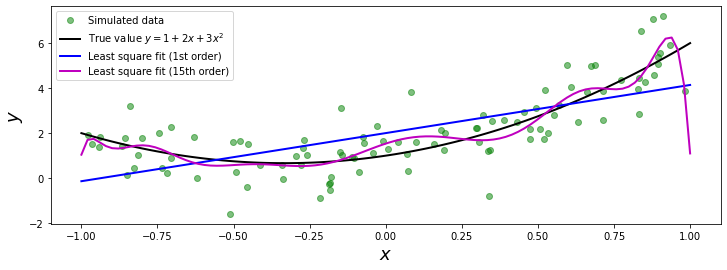

In [51]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(X, Y, 'go', alpha=0.5, label='Simulated data')
ax.plot(x, y_exact, 'k', lw=2, label=r'True value $y=1+2x+3x^2$')
ax.plot(x, y_fit1, 'b', lw=2, label=r'Least square fit (1st order)')
ax.plot(x, y_fit15, 'm', lw=2, label=r'Least square fit (15th order)')
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$y$', fontsize=18)
ax.legend(loc=2)

In [53]:
eps, delta = sympy.symbols('epsilon, Delta')
H = sympy.Matrix([[eps, delta], [delta, -eps]])
H

⎡ε  Δ ⎤
⎢     ⎥
⎣Δ  -ε⎦

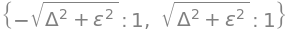

In [54]:
H.eigenvals()

In [55]:
H.eigenvects()

⎡⎛                  ⎡⎡      -Δ        ⎤⎤⎞  ⎛                 ⎡⎡      -Δ       
⎢⎜    _________     ⎢⎢────────────────⎥⎥⎟  ⎜   _________     ⎢⎢───────────────
⎢⎜   ╱  2    2      ⎢⎢       _________⎥⎥⎟  ⎜  ╱  2    2      ⎢⎢       ________
⎢⎜-╲╱  Δ  + ε  , 1, ⎢⎢      ╱  2    2 ⎥⎥⎟, ⎜╲╱  Δ  + ε  , 1, ⎢⎢      ╱  2    2
⎢⎜                  ⎢⎢ε + ╲╱  Δ  + ε  ⎥⎥⎟  ⎜                 ⎢⎢ε - ╲╱  Δ  + ε 
⎢⎜                  ⎢⎢                ⎥⎥⎟  ⎜                 ⎢⎢               
⎣⎝                  ⎣⎣       1        ⎦⎦⎠  ⎝                 ⎣⎣       1       

 ⎤⎤⎞⎤
─⎥⎥⎟⎥
_⎥⎥⎟⎥
 ⎥⎥⎟⎥
 ⎥⎥⎟⎥
 ⎥⎥⎟⎥
 ⎦⎦⎠⎦

In [56]:
(eval1, _, evec1), (eval2, _, evec2) = H.eigenvects()
sympy.simplify(evec1[0].T*evec2[0])

[0]

In [57]:
A = np.array([[1, 3, 5], [3, 5, 3], [5, 3, 9]])

In [59]:
evals, evecs = la.eig(A)

In [60]:
evals

array([13.35310908+0.j, -1.75902942+0.j,  3.40592034+0.j])

In [61]:
evecs

array([[ 0.42663918,  0.90353276, -0.04009445],
       [ 0.43751227, -0.24498225, -0.8651975 ],
       [ 0.79155671, -0.35158534,  0.49982569]])

In [64]:
A.dot(evecs[0])

array([2.93676522, 5.67729799, 4.48294416])

In [66]:
evals[0]*evecs[0]

array([ 5.69695953+0.j, 12.06497147+0.j, -0.53538552+0.j])

In [67]:
la.eigvalsh(A)

array([-1.75902942,  3.40592034, 13.35310908])

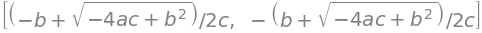

In [68]:
x, a, b, c = sympy.symbols('x, a, b, c')
sympy.solve(a+b*x+c*x**2, x)

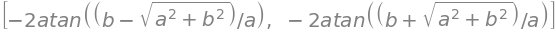

In [69]:
sympy.solve(a*sympy.cos(x)-b*sympy.sin(x), x)

In [70]:
sympy.solve(sympy.sin(x)-x, x)

NotImplementedError: multiple generators [x, sin(x)]
No algorithms are implemented to solve equation -x + sin(x)

In [71]:
x = np.linspace(-2, 2, 1000)

In [72]:
f1 = x**2-x-1

In [73]:
f2 = x**3-3*np.sin(x)

In [74]:
f3 = np.exp(x)-2

In [75]:
f4 = 1-x**2+np.sin(50/(1+x**2))

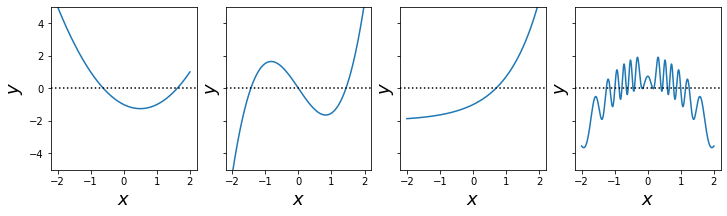

In [78]:
fig, axes = plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for n, f in enumerate([f1, f2, f3, f4]):
    axes[n].plot(x, f, lw=1.5)
    axes[n].axhline(0, ls=':', color='k')
    axes[n].set_ylim(-5, 5)
    axes[n].set_xticks([-2, -1, 0, 1, 2])
    axes[n].set_xlabel(r'$x$', fontsize=18)
    axes[n].set_ylabel(r'$y$', fontsize=18)

In [79]:
f = lambda x: np.exp(x)-2

In [80]:
tol = 0.1

In [81]:
a, b = -2, 2

In [82]:
x = np.linspace(-2.1, 2.1, 1000)

Text(0.5, 1.0, 'Bisection method')

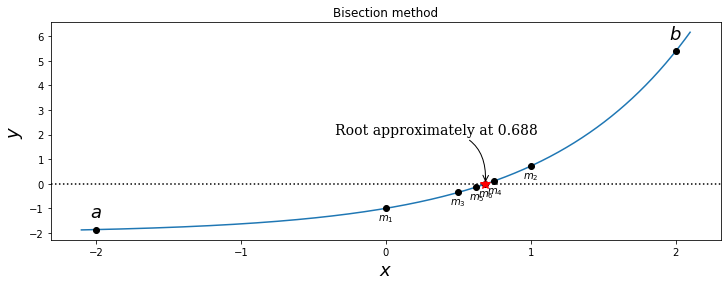

In [83]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.plot(x, f(x), lw=1.5)
ax.axhline(0, ls=':', color='k')
ax.set_xticks([-2, -1, 0, 1, 2])
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$y$', fontsize=18)
fa, fb = f(a), f(b)
ax.plot(a, fa, 'ko')
ax.plot(b, fb, 'ko')
ax.text(a, fa+0.5, r'$a$', ha='center', fontsize=18)
ax.text(b, fb+0.5, r'$b$', ha='center', fontsize=18)
n = 1
while b-a>tol:
    m = a+(b-a)/2
    fm = f(m)
    ax.plot(m, fm, 'ko')
    ax.text(m, fm-0.5, r'$m_%d$'%n, ha='center')
    n+=1
    if np.sign(fa)==np.sign(fm):
        a, fa = m, fm
    else:
        b, fb = m, fm
ax.plot(m, fm, 'r*', markersize=10)
ax.annotate('Root approximately at %.3f'%m,
            fontsize=14, family='serif', xy=(a, fm), xycoords='data',
            xytext=(-150,+50), textcoords='offset points',
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3, rad=-.5'))
ax.set_title('Bisection method')

In [84]:
tol = 0.01
xk = 2

In [86]:
s_x = sympy.symbols('x')
s_f = sympy.exp(s_x)-2

In [87]:
f = lambda x: sympy.lambdify(s_x, s_f, 'numpy')(x)

In [88]:
fp = lambda x: sympy.lambdify(s_x, sympy.diff(s_f, s_x), 'numpy')(x)

In [89]:
x = np.linspace(-1, 2.1, 1000)

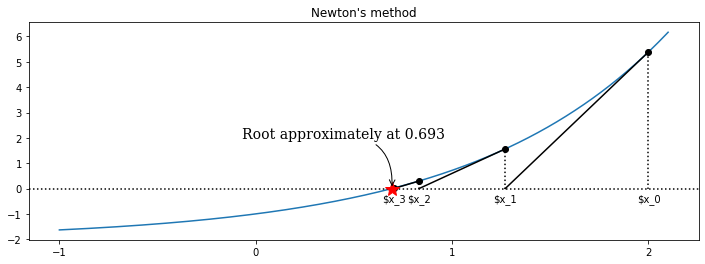

In [90]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.plot(x, f(x))
ax.axhline(0, ls=':', color='k')
n = 0
while f(xk)>tol:
    xk_new = xk-f(xk)/fp(xk)
    ax.plot([xk, xk], [0, f(xk)], color='k', ls=':')
    ax.plot(xk, f(xk), 'ko')
    ax.text(xk, -.5, r'$x_%d'%n, ha='center')
    ax.plot([xk, xk_new], [f(xk), 0], 'k-')
    xk = xk_new
    n+=1
ax.plot(xk, f(xk), 'r*', markersize=15)
ax.annotate('Root approximately at %.3f'%xk,
            fontsize=14, family='serif', xy=(xk, f(xk)), xycoords='data',
            xytext=(-150,+50), textcoords='offset points',
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3, rad=-.5'))
ax.set_title('Newton\'s method')
ax.set_xticks([-1, 0, 1, 2])

In [91]:
optimize.bisect(lambda x: np.exp(x)-2, -2, 2)

In [92]:
x_root_guess = 2
f = lambda x: np.exp(x)-2
fprime = lambda x: np.exp(x)
optimize.newton(f, x_root_guess)

In [93]:
optimize.newton(f, x_root_guess, fprime=fprime)

In [94]:
optimize.brentq(lambda x: np.exp(x)-2, -2, 2)

In [95]:
optimize.brenth(lambda x: np.exp(x)-2, -2, 2)

In [96]:
def f(x):
    return [x[1]-x[0]**3-2*x[0]**2+1, x[1]+x[0]**2-1]

In [97]:
f([1, 2])

In [98]:
optimize.fsolve(f, [1, 1])

array([0.73205081, 0.46410162])

In [100]:
x, y = sympy.symbols('x, y')
f_mat = sympy.Matrix([y-x**3-2*x**2+1, y+x**2-1])
f_mat

⎡   3      2        ⎤
⎢- x  - 2⋅x  + y + 1⎥
⎢                   ⎥
⎢     2             ⎥
⎣    x  + y - 1     ⎦

In [102]:
f_mat.jacobian(sympy.Matrix([x, y]))

⎡     2         ⎤
⎢- 3⋅x  - 4⋅x  1⎥
⎢               ⎥
⎣    2⋅x       1⎦

In [104]:
def f_jacobian(x):
    return [[-3*x[0]**2-4*x[0], 1], [2*x[0], 1]]

In [105]:
optimize.fsolve(f, [1, 1], fprime=f_jacobian)

array([0.73205081, 0.46410162])

Text(0.5, 0, '$x$')

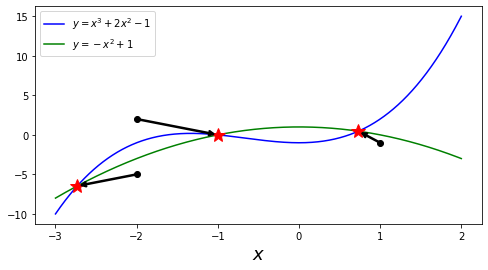

In [106]:
def f(x):
    return [x[1]-x[0]**3-2*x[0]**2+1, x[1]+x[0]**2-1]
x = np.linspace(-3, 2, 5000)
y1 = x**3+2*x**2-1
y2 = -x**2+1
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(x, y1, 'b', lw=1.5, label=r'$y=x^3+2x^2-1$')
ax.plot(x, y2, 'g', lw=1.5, label=r'$y=-x^2+1$')
x_guesses=[[-2, 2], [1, -1], [-2, -5]]
for x_guess in x_guesses:
    sol = optimize.fsolve(f, x_guess)
    ax.plot(sol[0], sol[1], 'r*', markersize=15)
    ax.plot(x_guess[0], x_guess[1], 'ko')
    ax.annotate('', xy=(sol[0], sol[1]), xytext=(x_guess[0], x_guess[1]),
                arrowprops=dict(arrowstyle='->', linewidth=2.5))
ax.legend(loc=0)
ax.set_xlabel(r'$x$', fontsize=18)

/home/anindya/miniconda3/envs/ds/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Text(0.5, 0, '$x$')

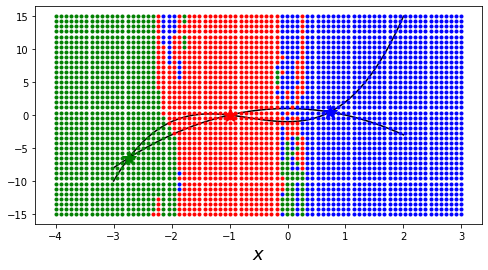

In [108]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(x, y1, 'k', lw=1.5)
ax.plot(x, y2, 'k', lw=1.5)
sol1 = optimize.fsolve(f, [-2,  2])
sol2 = optimize.fsolve(f, [ 1, -1])
sol3 = optimize.fsolve(f, [-2, -5])
sols = [sol1, sol2, sol3]
colors = ['r', 'b', 'g']
for idx, s in enumerate(sols):
    ax.plot(s[0], s[1], colors[idx]+'*', markersize=15)
for m in np.linspace(-4, 3, 80):
    for n in np.linspace(-15, 15, 40):
        x_guess = [m, n]
        sol = optimize.fsolve(f, x_guess)
        idx = (abs(sols - sol)**2).sum(axis=1).argmin()
        ax.plot(x_guess[0], x_guess[1], colors[idx]+'.')
ax.set_xlabel(r'$x$', fontsize=18)